# Stock Data Analysis (using yfinance)

In [1]:
#Using this library to import the data 
import yfinance as yf

#Using this library for sentiment analysis
from transformers import pipeline

#Using this library to plot graphs
import matplotlib.pyplot as plt

#Used this library additionally to increase interpretability of the sentiment analysis - by using a dataframe
import pandas as pd

#Used numpy for using the .arrange method 
import numpy as np

#### Creating new Functions:

* Function get_stock_data  
* Function plot_stock_trend  
* Function plot_daily_returns
* Function plot_cumulative_returns 
* Function - insights_stock_trend
* Function - cal_returns

_Note: Created new functions for accessibility of code, can perform analysis on multiple tickers using the functions_

In [2]:
#Function - cal_returns
def calc_returns(prices):  
    #Initializing an empty list to store the returns
    returns = []  
    for i in range(1, len(prices)):
        #Calculating the rate of return and adding it to a list - 'returns'
        r = (prices[i] / prices[i-1]) - 1
        r_rounded = round(r, 2)  #Using round function to round the return to 2 decimal places
        returns.append(r_rounded)
    return returns

In [4]:
def get_stock_data(ticker_symbol, start_date, end_date):
    """
    This function fetches the historical stock data for a given ticker symbol between a start and end date. 
    It uses the ytfinance library to get the stock data.
    
    Arguments:
    - ticker_symbol (str): The stock's ticker symbol.
    - start_date (str): The start date in 'YYYY-MM-DD' format.
    - end_date (str): The end date in 'YYYY-MM-DD' format.
    
    Returns:
    - pandas.DataFrame: Stock data including open, close, high, low, volume.
    """
    #Using the yfinance library to create a Ticker object for the given stock ticker symbol
    ticker_data = yf.Ticker(ticker_symbol)
    #Using History method of the ticker object to get the historical stock data 
    stock_data = ticker_data.history(start=start_date, end=end_date)
    return stock_data

def plot_stock_trend(dates, closing_prices):
    """
    This function plots the trend of the stock's closing price for the given dates. 
    This tells us how the stock price moved in the given timeframe.
    
    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the closing prices.
    - closing_prices (list): List of closing prices for the stock.
    """
    plt.figure(figsize=(12, 6))
    #Plotting  the closing prices against the dates
    #'marker' - each data point should be marked with a circle
    #'linestyle' - the style of the line is a solid line
    #'color' - the color of both the line and markers - blue
    plt.plot(dates, closing_prices, marker='o', linestyle='-', color='steelblue')
    plt.title('Stock Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (in $)')
    #Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)
    #Enbabling grid lines for better understanding of the data points
    plt.grid(True)
    plt.show()

def plot_daily_returns(dates, daily_returns):
    """
    This function plots the daily returns of the stock in a given time, which helps us understand the daily performance of the stock. 
    The daily returns are calculated as the percentage change in closing price from one day to the next.
    
    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the daily returns.
    - daily_returns (list): List of daily returns calculated from the stock prices.
    """
    plt.figure(figsize=(12, 6))
    #Skipping the first date because daily returns start from the second day (no return on the first day)
    plt.plot(dates[1:], daily_returns, marker='o', linestyle='-', color='red')
    plt.title('Daily Returns Trend')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_cumulative_returns(dates, stock_returns):
    """
    This function plots the cumulative returns of the stock in a given time, which tells us the overall return performance of the stock in the given timeframe. 
    The cumulative returns are calculated by summing up all daily returns up to each point in time which tells us the total return over the timeframe. 
    
    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the stock returns.
    - stock_returns (list): List of stock returns to calculate cumulative returns from.
    """
    #Creating a new list where each element is the total return up to that date
    cumulative_returns = [sum(stock_returns[:i+1]) for i in range(len(stock_returns))]
    plt.figure(figsize=(12, 6))
    #Plotting by skipping the first date since cumulative returns start calculating from the second day
    plt.plot(dates[1:], cumulative_returns, marker='o', linestyle='-', color='green')
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def insights_stock_trend(closing_prices, stock_returns):
    """
    This function is automated to give us the basic trends of the stock in a given timeframe 
    (Trend of price change,  Consistency in daily returns and Identifying largest gain and drop in a day).
    
    Arguments:
    - closing_prices (list): List of closing stock prices.
    - stock_returns (list): List of stock returns.
    
    Returns:
    - str: Insights on the stock's price trend, return consistency, and significant daily changes.
    """
    
    #Initializing the insights variable as an empty string 
    insights = "" 
    
    #Trend of price change over the given period
    price_change_percentage = ((closing_prices[-1] - closing_prices[0]) / closing_prices[0]) * 100
    if price_change_percentage > 0:
        insights += f"The stock price increased by {price_change_percentage:.2f}% over the period.\n"
    elif price_change_percentage < 0:
        insights += f"The stock price decreased by {price_change_percentage:.2f}% over the period.\n"
    else:
        insights += "The stock price remained the same over the period.\n"

    #Consistency trend in daily returns
    positive_days = sum(1 for r in stock_returns if r > 0)
    negative_days = sum(1 for r in stock_returns if r < 0)
    if all(r > 0 for r in stock_returns):
        insights += "The stock showed a consistently positive return every day over the period.\n"
    elif all(r < 0 for r in stock_returns):
        insights += "The stock showed a consistently negative return every day over the period.\n"
    else:
        insights += f"The stock returns varied, with {positive_days} days of positive returns and {negative_days} days of negative returns over the period.\n"
        
    #Identifying largest gain and drop in a day
    max_gain = max(stock_returns)
    max_drop = min(stock_returns)
    insights += f"The largest single-day gain was {max_gain:.2f}%, while the largest single-day drop was {max_drop:.2f}%.\n"
    return insights

#### Chosen company - Bank of America Corporation (BAC)

In [5]:
#Parameters decided (Using BAC ticker symbol)
ticker_symbol = "BAC"
start_date = "2023-05-01"
end_date = "2023-05-14"

#Getting stock data for the given ticker symbol and date range
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

C:\ProgramData\anaconda3\envs\Assignment1\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [6]:
#Checking the first 5 rows of the data fetched
stock_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-01 00:00:00-04:00,28.794770,28.833815,28.306723,28.345768,34076800,0.0,0.0
2023-05-02 00:00:00-04:00,28.160308,28.170070,27.047560,27.486803,70797700,0.0,0.0
2023-05-03 00:00:00-04:00,27.486803,27.818675,27.145170,27.193975,51139500,0.0,0.0
2023-05-04 00:00:00-04:00,26.920668,27.145169,26.188597,26.344772,82173800,0.0,0.0
2023-05-05 00:00:00-04:00,26.959711,27.223255,26.813296,27.047558,50050100,0.0,0.0


In [7]:
#Getting the closing prices from the stock data
closing_prices = stock_data['Close'].tolist()
#Calculating daily returns from the closing prices
stock_returns = calc_returns(closing_prices)

#### Printing the relevant results within the specified period

In [8]:
#Printing the closing prices for each day within the specified period
print("Closing Prices (in $):")
for date, price in zip(stock_data.index, closing_prices): 
    print(f"{date.date()}: {price:.2f}")

#Printting the daily return percentages for each period between the specified dates
print("\nReturns:")
for i, return_value in enumerate(stock_returns):
    print(f"Period {i+1}: {return_value:.2%}")

#Printing basic insights based on the trend of closing prices and stock returns
print("\nBasic Insights:")
print(insights_stock_trend(closing_prices, stock_returns))

Closing Prices (in $):
2023-05-01: 28.35
2023-05-02: 27.49
2023-05-03: 27.19
2023-05-04: 26.34
2023-05-05: 27.05
2023-05-08: 27.03
2023-05-09: 27.00
2023-05-10: 26.67
2023-05-11: 26.74
2023-05-12: 26.44

Returns:
Period 1: -3.00%
Period 2: -1.00%
Period 3: -3.00%
Period 4: 3.00%
Period 5: -0.00%
Period 6: -0.00%
Period 7: -1.00%
Period 8: 0.00%
Period 9: -1.00%

Basic Insights:
The stock price decreased by -6.71% over the period.
The stock returns varied, with 1 days of positive returns and 5 days of negative returns over the period.
The largest single-day gain was 0.03%, while the largest single-day drop was -0.03%.



#### Visual representation of the results

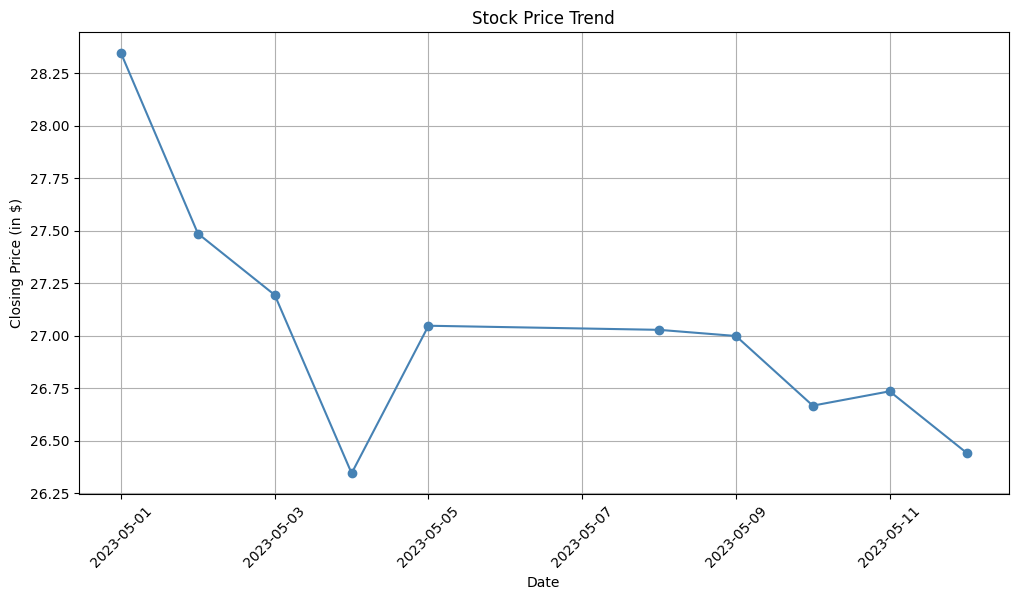

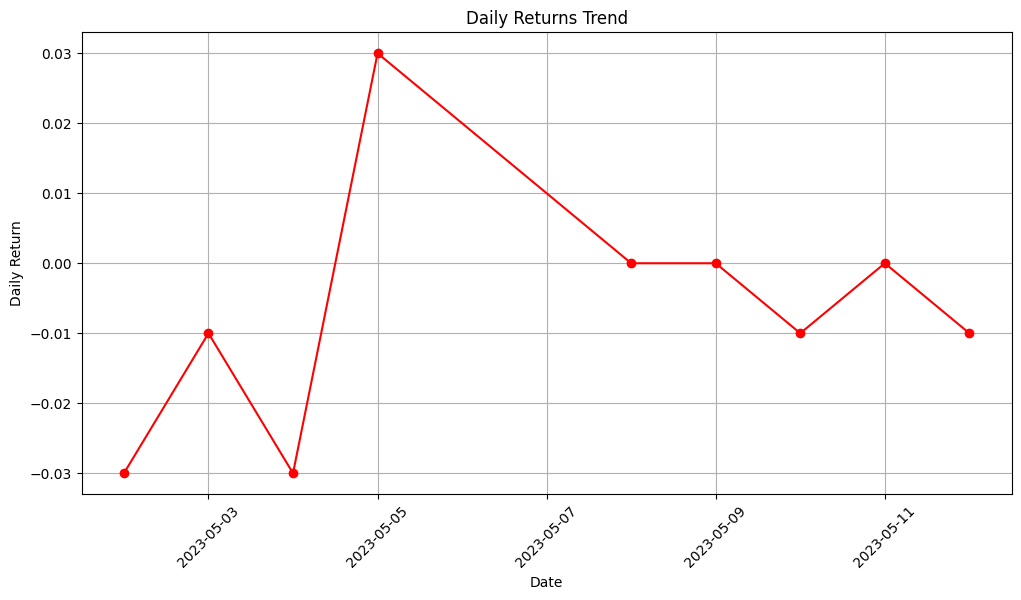

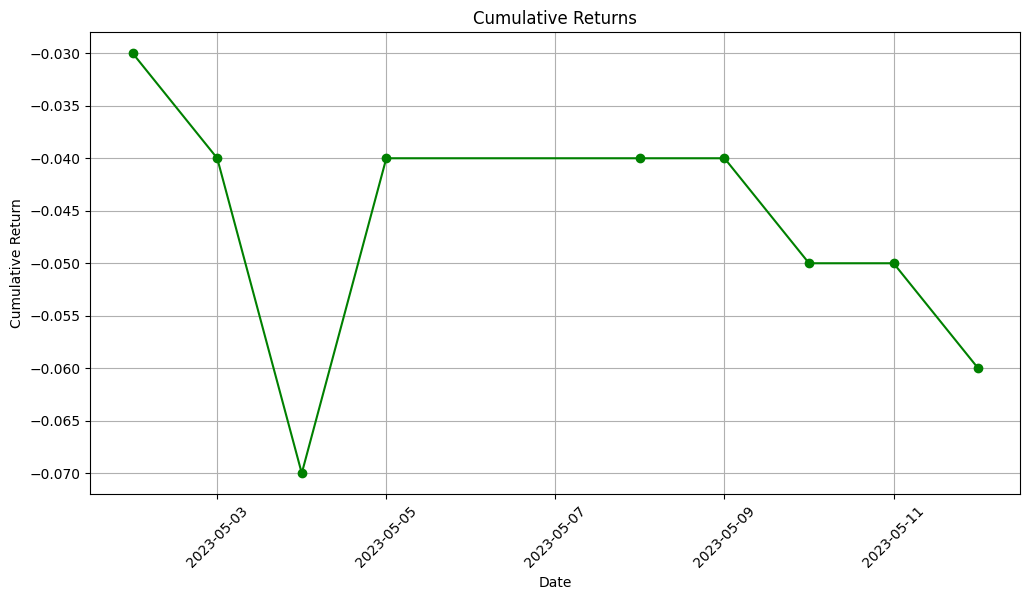

In [9]:
#Plotting the trend of stock closing prices over time
dates = stock_data.index
plot_stock_trend(dates, closing_prices)

#Plotting the daily returns to see their variability over the given period
plot_daily_returns(dates, stock_returns)

#Plot the cumulative returns to show the total percentage gain or loss over the period
plot_cumulative_returns(dates, stock_returns)

#### Insights from above:

* Stock Price Trend: The first graph shows a dcreasing trend in the stock's closing prices over the given period. This could indicate the bearish (falling prices trend) market for BAC in the given period. There's a dip in prices but increased a bit before decreasing gradually, could indicate some volatility. 
* Daily Returns Trend: The second graph which displays the daily returns fluctuates above and below zero during the given timeframe. The stock had positive and negative returns on different days, exactly how a stock market behaviour is. The spike on the second day (where the daily return was above 3%) which was followed by a decline (return around -3%), shows high level volatility again. 
* Cumulative Returns: The third graph shows the cumulative returns, which gives us an aggregate measure of the stock's performance over the period. It clearly shows a negative trend overall, telling us that the stock lost value over the timeframe which I chose to analyse. 

## Analysis

#### Creating new Functions: 

* Function print_data_and_insights
* Function plot_data
* Function calc_simple_moving_average

In [10]:
#Function - calc_simple_moving_average
def calc_simple_moving_average(prices, window_size):
    averages = []
    #Looping through the list of prices based on the window size
    for i in range(len(prices) - window_size + 1):
        #Calculating the average for the current window and adding to the list
        window_average = sum(prices[i:i+window_size]) / window_size
        rounded_average = round(window_average, 2)  #Rounding to 2 decimal places
        averages.append(rounded_average)
    return averages

In [12]:
def print_data_and_insights(dates, prices, sma):
    """
    Prints stock prices, SMA values and provides an analysis of trends.
    
    Arguments:
    - dates: List of dates corresponding to the stock prices.
    - prices: List of stock prices.
    - sma: List of SMA values.
    """
    #Formatting for better readability 
    print("{:<15} {:<10} {:<10}".format("Date", "Price", "SMA"))
    #Going through the SMA list to print each date, price and SMA in a formatted manner
    for i in range(len(sma)):
        date_str = dates[i+window-1].strftime('%Y-%m-%d') 
        print(f"{date_str:<15} {prices[i+window-1]:<10.2f} {sma[i]:<10.2f}")
        
    #Calculating the price change between the last two days
    price_change = prices[-1] - prices[-2]
    #Determining the direction of the change (increase or decrease)
    direction = "increased" if price_change > 0 else "decreased"
    #Calculating the magnitude of the change as a percentage
    magnitude = abs(price_change / prices[-2] * 100)

    trend = ""
    #Adding insights 
    if prices[-1] > sma[-1]:
        trend += "an upward trend, since the latest price is above the SMA.\n"
    elif prices[-1] < sma[-1]:
        trend += "a downward trend, since the latest price is below the SMA.\n"
    else:
        trend += "stable, since the latest price is equal to the SMA.\n"
    
    trend += f"The price has {direction} by {magnitude:.2f}% from the previous day.\n"

    #Identifying the recent peak and trough within the window
    recent_peak = max(prices[-window:])
    recent_trough = min(prices[-window:])
    #Adding insights 
    if prices[-1] == recent_peak:
        trend += "It's currently at a recent high. "
    elif prices[-1] == recent_trough:
        trend += "It's currently at a recent low. "
    else:
        #Calculating the percentage distance to the recent peak and trough for further insights
        distance_to_peak = (recent_peak - prices[-1]) / prices[-1] * 100
        distance_to_trough = (prices[-1] - recent_trough) / recent_trough * 100
        trend += f"It's {distance_to_peak:.2f}% below the recent peak and {distance_to_trough:.2f}% above the recent trough. "

    print(f"\nBasic Insights:\nThe stock is showing {trend}\n")

def plot_data(dates, prices, sma, window):
    """
    Plots stock prices and their Simple Moving Average on the same chart.
    
    Arguments:
    - dates: List of dates corresponding to the stock prices.
    - prices: List of stock prices.
    - sma: List of SMA values.
    - window: The window size used for the SMA.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label='Stock Price', color='steelblue', marker='o')
    sma_dates = dates[window-1:]  #Adjusting dates to match the SMA length
    plt.plot(sma_dates, sma, label=f'{window}-Day SMA', color='orangered', marker='o')
    plt.title('Stock Prices and Simple Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#### Printing the results

In [13]:
#Parameters decided
ticker = "BAC"
start_date = "2023-04-01"
end_date = "2023-06-01"
window = 14

#Fetching data and calculations
stock_data = get_stock_data(ticker, start_date, end_date)
closing_prices = stock_data['Close'].tolist()
sma_values = calc_simple_moving_average(closing_prices, window)

#Printing data
print_data_and_insights(stock_data.index, closing_prices, sma_values)

Date            Price      SMA       
2023-04-21      29.16      28.31     
2023-04-24      29.05      28.39     
2023-04-25      28.15      28.45     
2023-04-26      27.76      28.51     
2023-04-27      28.20      28.58     
2023-04-28      28.58      28.67     
2023-05-01      28.35      28.70     
2023-05-02      27.49      28.67     
2023-05-03      27.19      28.62     
2023-05-04      26.34      28.45     
2023-05-05      27.05      28.26     
2023-05-08      27.03      28.06     
2023-05-09      27.00      27.89     
2023-05-10      26.67      27.71     
2023-05-11      26.74      27.54     
2023-05-12      26.44      27.36     
2023-05-15      26.99      27.27     
2023-05-16      26.71      27.20     
2023-05-17      27.89      27.18     
2023-05-18      27.79      27.12     
2023-05-19      27.44      27.05     
2023-05-22      27.66      27.07     
2023-05-23      27.90      27.12     
2023-05-24      27.43      27.19     
2023-05-25      27.50      27.23     
2023-05-26  

C:\ProgramData\anaconda3\envs\Assignment1\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


#### Visual representation of the results

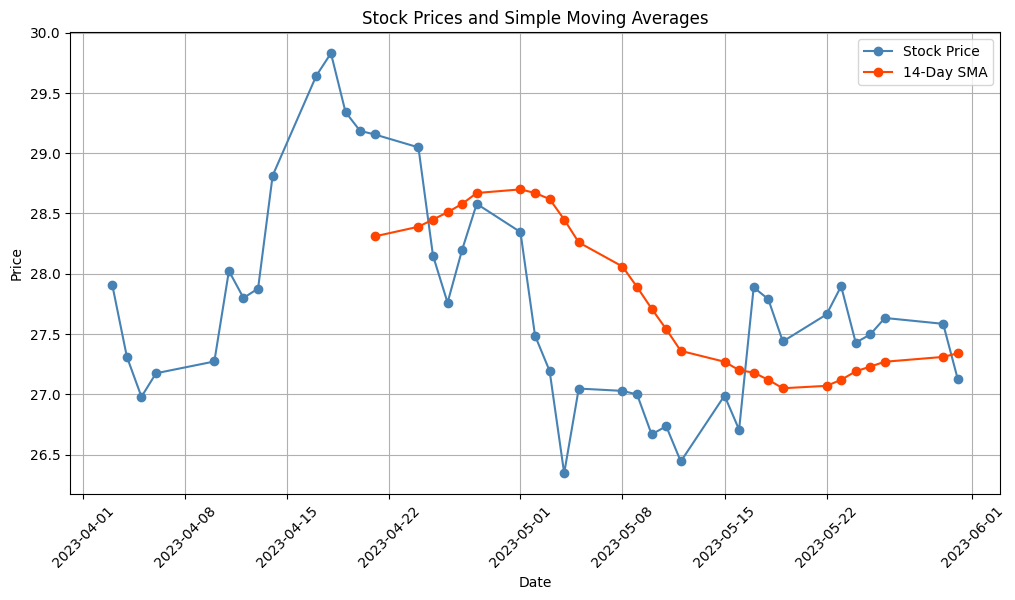

In [14]:
plot_data(stock_data.index, closing_prices, sma_values, window)

#### Insights from above:

* The blue line represents that BAC'S stock price which shows several peaks and troughs, indicating the volatalie nature of the stock during the given timeframe.
* The red line represents the 14-day SMA of the BAC's stock price. It is less fluctuated (more smooth) as compared to the blue line because it averages the prices over the past 14 days which reduces the single day's price movement. This SMA line is very important as it makes it easier to see if the stock prices are going higher or not. Whenever the stock prices crosses over the SMA line it usually suggests that the stock is entering an upward trend (which is implemented in the automated basic trends function, to give insights automatically). 
* Both lines show a general downward trend, which is clear from mid April to the end of May. the stock price has decreased significantly and the SMA line also decreased, indicating bearish time for BAC's stock. 
* There are points on the graph (mid May to end May) where the stock price crosses the SMA line, shows some short-term momentum for BAC. 

## Senitment Analysis of the news title

#### Method of Analysis:

* Using the GitHub repo -> https://github.com/ranaroussi/yfinance/blob/main/yfinance/ticker.py -> found the .get_news() method to fetch news
* Using the HuggingPage Models Most Downloads Page, gave keywords "sentiment" and "sentiment"+"news" -> https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment -> used this to shortlist a diverse set of pre-trained models for the sentiment analysis: 
  1.  mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis -> Model trained on financial news data.
  2.  mrm8488/deberta-v3-ft-financial-news-sentiment-analysis -> Trained on financial news data, here too.
  3.  ProsusAI/finbert -> Specific for financial texts.
  4.  michelecafagna26/gpt2-medium-finetuned-sst2-sentiment -> GPT2 Based General Sentiment Model.
  5.  cardiffnlp/twitter-roberta-base-sentiment-latest -> Trained on 124M tweets - which could potentially include financial tweets (General Sentiment Model).
  6.  Jean-Baptiste/roberta-large-financial-news-sentiment-en -> Trained on Canadian financial news (Since BAC is a popular bank in Canada).
* The reason why I'm doing the analysis across different models is because each models have different training set, where the results might vary, so to capture the right sentiment of the news title, I'll be be implementing these models in a pipeline to apply it to our stock data for sentiment analysis. I've further used pandas dataframe here to put the results in a tabular form - to make it more interpretable.

_Note: I've added both general based models and financial specifc based sentinment models for analysis. The reason why I chose general sentiment models as well is to just see if general training data models can predict financial news sentiments or not._

In [15]:
#Selected Models
models = {
    "distilroberta-finetuned-financial-news-sentiment": "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    "deberta-v3-ft-financial-news": "mrm8488/deberta-v3-ft-financial-news-sentiment-analysis",
    "finbert": "ProsusAI/finbert",
    "gpt2-medium-finetuned-sst2-sentiment": "michelecafagna26/gpt2-medium-finetuned-sst2-sentiment",
    "twitter-roberta-base-sentiment-latest": "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "roberta-large-financial-news-sentiment-en":"Jean-Baptiste/roberta-large-financial-news-sentiment-en"
}

#Initializing pipelines for each model
pipelines = {name: pipeline("sentiment-analysis", model=model) for name, model in models.items()}

#Fetching news data for "BAC" - ticker symbol
ticker = "BAC"
stock = yf.Ticker(ticker)
news_articles = stock.get_news()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All PyTorch model weights were used when initializing TFDebertaV2ForSequenceClass

#### Checking the field names returned by get_news() function:

In [16]:
if news_articles:
    first_article_keys = news_articles[0].keys()
    print(first_article_keys)
else:
    print("No news articles found.")

dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])


_From above we can see that there's title and providerPublishTime -> which will be helpful for our analysis._

#### Performing Sentiment analysis for the news titles: 

In [17]:
#A list to hold all data
data = []

#Processing each article
for article in news_articles[:30]:  #Kept limit to 30 news titles
    title = article['title']
    #Converting 'providerPublishTime' from Unix timestamp to human-readable date
    date = pd.to_datetime(article['providerPublishTime'], unit='s').strftime('%Y-%m-%d %H:%M:%S')
    article_data = {"Title": title, "Date": date}
    
    #Performing sentiment analysis using each model
    for name, pipe in pipelines.items():
        try:
            sentiment = pipe(title)
            label = sentiment[0]['label']
            score = sentiment[0]['score']
            article_data[name] = f"{label}, {score:.2f}"
        except Exception as e:
            article_data[name] = "Error"

    #Appending the article_data with each title, date, and results 
    data.append(article_data)

#Converting the list of dictionaries into a pandas DataFrame - for better interpretability
df = pd.DataFrame(data)
df.set_index(["Title"], inplace=True)

In [18]:
#Displaying the dataframe to see the results
df

,Date,distilroberta-finetuned-financial-news-sentiment,deberta-v3-ft-financial-news,finbert,gpt2-medium-finetuned-sst2-sentiment,twitter-roberta-base-sentiment-latest,roberta-large-financial-news-sentiment-en
Title,,,,,,,
"BofA Report Finds 401(k) Account Balances Increased by 15% in 2023, Health Savings Account Balances Increased by 11%",2024-02-07 13:00:00,"positive, 1.00","positive, 0.99","negative, 0.43","POSITIVE, 0.93","neutral, 0.35","positive, 0.94"
Schwab Investors Pile Into 5 Stocks And Bail Out On Another 5,2024-02-06 13:00:37,"neutral, 0.95","negative, 0.69","positive, 0.38","NEGATIVE, 1.00","positive, 0.35","neutral, 0.95"
"RBA Keeps Rate at 12-Year High, Signals Higher Bar for Rate Hikes",2024-02-06 06:31:16,"positive, 1.00","neutral, 0.91","negative, 0.36","POSITIVE, 1.00","neutral, 0.37","neutral, 0.60"
Commercial real estate a 'manageable' problem but some banks will close: Powell,2024-02-05 16:12:01,"negative, 0.58","negative, 1.00","positive, 0.38","NEGATIVE, 0.76","neutral, 0.35","negative, 0.78"
"The ‘Future Is Bright’ for These 2 Banking Stock Giants, Says Morgan Stanley",2024-02-05 13:13:43,"positive, 0.87","positive, 0.91","negative, 0.46","POSITIVE, 1.00","neutral, 0.36","positive, 0.94"
Investing in Bank of America (NYSE:BAC) five years ago would have delivered you a 33% gain,2024-02-05 13:00:17,"positive, 1.00","positive, 1.00","negative, 0.40","NEGATIVE, 0.83","negative, 0.36","positive, 0.94"
We're Officially in a Bull Market. Here Are 2 Stocks I'm Buying Now.,2024-02-05 11:11:00,"neutral, 1.00","neutral, 0.80","positive, 0.37","NEGATIVE, 1.00","negative, 0.35","positive, 0.94"
Bank of America trims CEO Brian Moynihan’s pay package to $29M,2024-02-05 07:40:11,"positive, 0.83","negative, 0.73","positive, 0.38","NEGATIVE, 1.00","negative, 0.36","negative, 0.94"


#### Sentiment Model Comparision:

* Difference Across the Models: The sentiment scores across each models (financial based and popular general ones) for the same new titles show a significant differences. The general tweet based model (twitter-roberta-base-sentiment-latest) since trained on a general dataset seems to be predicting sentiment scores inaccurately as seen in the 5th title ("Investing in Bank....") which is indeed a positive sentiment which was predicted accuarately by all of the financial news based models (used here).

* Financial News Specific Models: Models like distilroberta-finetuned-financial-news-sentiment-analysis, deberta-v3-ft-financial-news-sentiment-analysis, finbert, and roberta-large-financial-news-sentiment-en performed more accurately in my perspective. The reason is mainly because the training data was either specific to financial texts or financial news. These models represent the sentiment better. 

* General Sentiment Models: Models like gpt2-medium-finetuned-sst2-sentiment and twitter-roberta-base-sentiment-latest might not the good choice for financial news. Most of thier assessments were incorrect. As mentioned earlier this was just a test to see if these models can perform well on news titles but here in this particular, doesn't seem to be the case.

Hence, removing the general based models from our dataframe: 

In [19]:
#Using drop method
df = df.drop(columns=['gpt2-medium-finetuned-sst2-sentiment', 'twitter-roberta-base-sentiment-latest'])

In [20]:
df

,Date,distilroberta-finetuned-financial-news-sentiment,deberta-v3-ft-financial-news,finbert,roberta-large-financial-news-sentiment-en
Title,,,,,
"BofA Report Finds 401(k) Account Balances Increased by 15% in 2023, Health Savings Account Balances Increased by 11%",2024-02-07 13:00:00,"positive, 1.00","positive, 0.99","negative, 0.43","positive, 0.94"
Schwab Investors Pile Into 5 Stocks And Bail Out On Another 5,2024-02-06 13:00:37,"neutral, 0.95","negative, 0.69","positive, 0.38","neutral, 0.95"
"RBA Keeps Rate at 12-Year High, Signals Higher Bar for Rate Hikes",2024-02-06 06:31:16,"positive, 1.00","neutral, 0.91","negative, 0.36","neutral, 0.60"
Commercial real estate a 'manageable' problem but some banks will close: Powell,2024-02-05 16:12:01,"negative, 0.58","negative, 1.00","positive, 0.38","negative, 0.78"
"The ‘Future Is Bright’ for These 2 Banking Stock Giants, Says Morgan Stanley",2024-02-05 13:13:43,"positive, 0.87","positive, 0.91","negative, 0.46","positive, 0.94"
Investing in Bank of America (NYSE:BAC) five years ago would have delivered you a 33% gain,2024-02-05 13:00:17,"positive, 1.00","positive, 1.00","negative, 0.40","positive, 0.94"
We're Officially in a Bull Market. Here Are 2 Stocks I'm Buying Now.,2024-02-05 11:11:00,"neutral, 1.00","neutral, 0.80","positive, 0.37","positive, 0.94"
Bank of America trims CEO Brian Moynihan’s pay package to $29M,2024-02-05 07:40:11,"positive, 0.83","negative, 0.73","positive, 0.38","negative, 0.94"


#### Sentiment analysis insights on each news title:

1. Schwab Investors Pile Into 5 Stocks And Bail Out On Another 5: The sentiment is mostly neutral (by 3 models predicting neutral), which indicates a balanced view of the situation.
2. RBA Keeps Rate at 12-Year High, Signals Higher Bar for Rate Hikes: Positive and neutral sentiments from 2 models each suggesting a balanced/optimistic view of the situation.
3. Commercial Real Estate a 'Manageable' Problem But Some Banks Will Close: This title received a consistently negative sentiment. Since the title is mentioning some of the banks closing, so the negative sentiment makes sense.
4. The ‘Future Is Bright’ for These 2 Banking Stock Giants, Says Morgan Stanley: Positive sentiments from all the models which shows an optimistic view of the situation by showing confidence in the future performance of these banking stocks also backed by a big reputable firm.
5. Investing in Bank of America (NYSE:BAC) five years ago would have delivered you a 33% gain: Positive sentiment by all the models which indicates the success and growth of Bank of America.
6. We're Officially in a Bull Market. Here Are 2 Stocks I'm Buying Now: 3 neutral sentiments suggesting that this has something to do with the market rather than the company.
7. Bank of America Trims CEO Brian Moynihan’s Pay Package to $29M: Mostly negative sentiments from the models, where the title seems like a criticism about the CEO's pay package.
8. Citigroup Fell Behind With Rich Customers. Can It Win Them Back?: Mixed sentiments, but dominated by negative from a financial perspective, which makes sense. 

#### Date vs Sentiment Analysis: 

In [21]:
#Function to convert sentiment string to score
def convert_sentiment_to_score(sentiment_str):
    sentiment, score = sentiment_str.split(", ")
    score = float(score)
    if sentiment == "positive":
        return score
    elif sentiment == "negative":
        return -score
    return 0  #Keeping Neutral sentiment score to 0

#Converting sentiment strings to scores for each model
for column in df.columns[1:]:
    df[column] = df[column].apply(convert_sentiment_to_score)

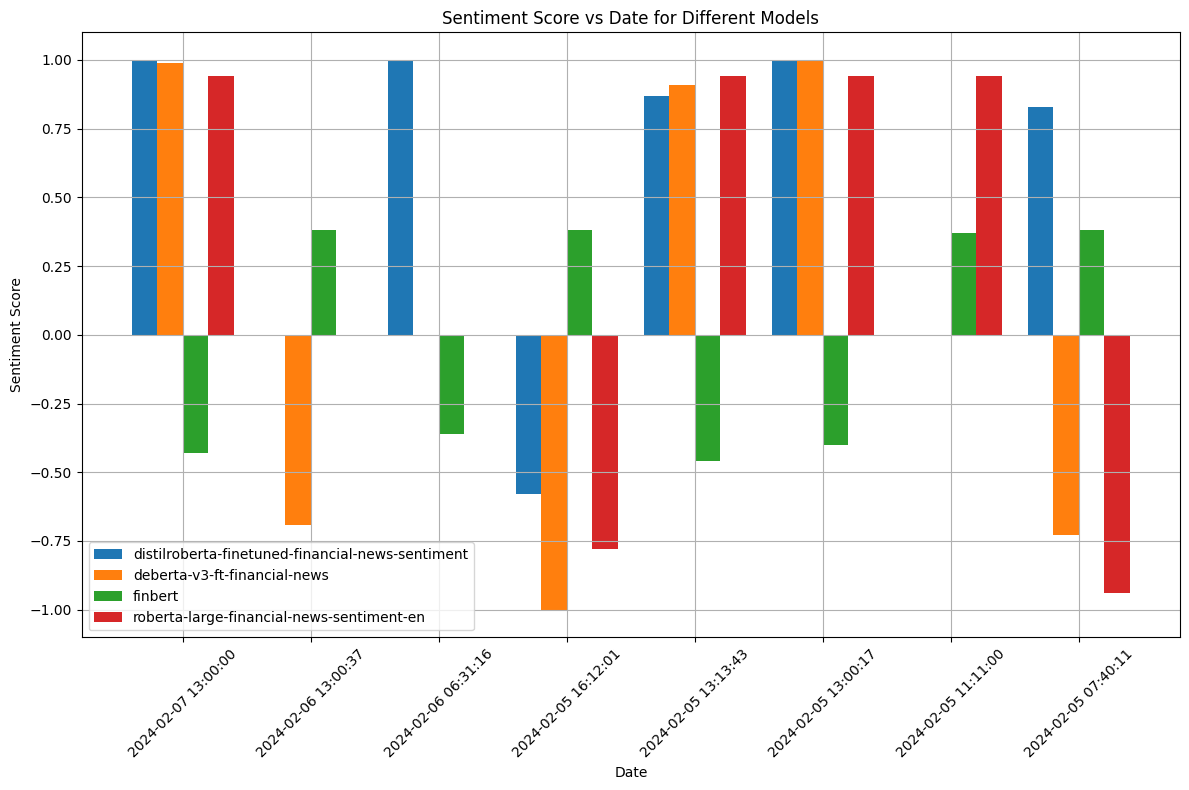

In [22]:
#Plotting
plt.figure(figsize=(12, 8))

#Determining the width of a bar
n_models = len(df.columns) - 1  #Number of models
bar_width = 0.8 / n_models  #Total width for models is set to 0.8 to leave some space between days
dates = np.arange(len(df['Date']))  #Numeric x-axis for dates

for i, column in enumerate(df.columns[1:], start=1):
    #Offset each bar for each model to prevent overlap
    offsets = (i - (n_models + 1) / 2) * bar_width
    plt.bar(dates + offsets, df[column], width=bar_width, label=column)

plt.title('Sentiment Score vs Date for Different Models')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(dates, df['Date'], rotation=45)  # Set x-ticks to show dates
plt.tight_layout()
plt.show()

#### Inisghts from above: 

From the above graph if we note the positive sentiments, it could relate to the stock price increasing on those dates/times.
On dates where all three models agree on a positive sentiment it means that there was indeed good news for BAC on that date. Dates where only one or two models show positive sentiment may indicate lesser percentage of the news being good or the models are interpreting the news differently. Dates with the highest bars (close to 1) suggests very positive news. 

#### Checking if BAC had an upward trend when sentiments were positive (mainly examining timeperiod 5th Feb to 7th Feb):

In [23]:
ticker = "BAC"
start_date = "2024-02-01"
end_date = "2024-02-08"
window = 3

#Fetching data and calculations
stock_data = get_stock_data(ticker, start_date, end_date)
closing_prices = stock_data['Close'].tolist()
sma_values = calc_simple_moving_average(closing_prices, window)

#Printing data
print_data_and_insights(stock_data.index, closing_prices, sma_values)

Date            Price      SMA       
2024-02-05      32.99      33.34     
2024-02-06      33.04      33.17     
2024-02-07      33.18      33.07     

Basic Insights:
The stock is showing an upward trend, since the latest price is above the SMA.
The price has increased by 0.42% from the previous day.
It's currently at a recent high. 



C:\ProgramData\anaconda3\envs\Assignment1\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


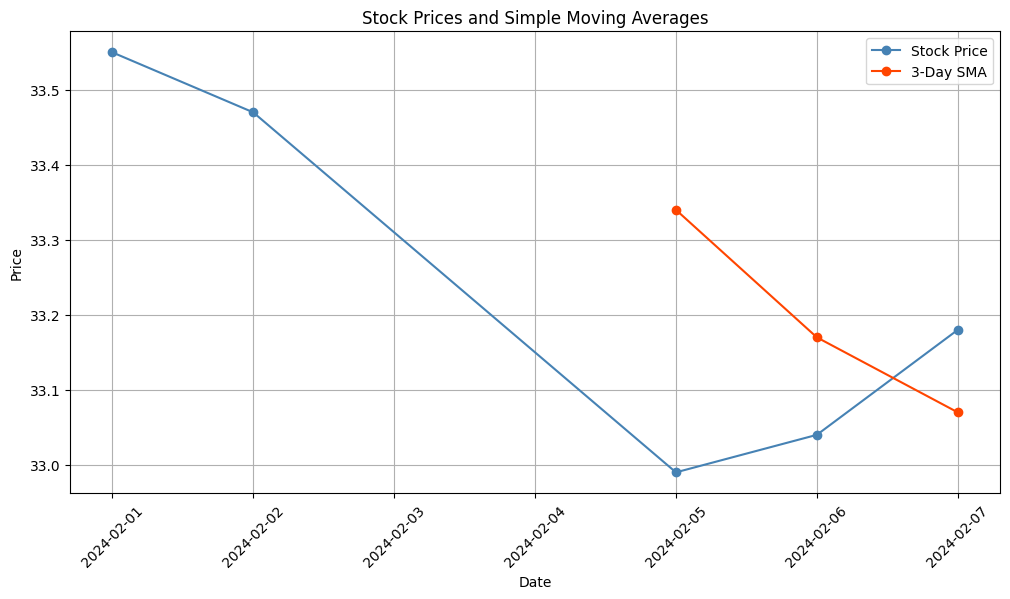

In [24]:
plot_data(stock_data.index, closing_prices, sma_values, window)

#### Insights from above: 

From the above graph and the automated basic insights we can see there's an upward trend from 5th to 7th Feb 2024, since there were many positive sentiments in the previous graph and especially with the news on 7th, we can see a that the stock price is above SMA on 7th in the above graph. Hence, our analysis here that positive sentiments increasing the stock price is true. 